1. Define the Problem
2. Collect Data
3. Data Cleaning and Preprocessing

      Label Encoding, One-Hot Encoding

4. Exploratory Data Analysis (EDA)
5. Feature Selection and Engineering

      Correlation, PCA

6. Split Data into Training and Testing Sets
7. Select a Machine Learning Algorithm

      Linear Regression, Random Forest, SVM, KNN, Neural Networks

8. Train the Model
9. Evaluate Model Performance

      Accuracy, Precision, Recall, F1-score, RMSE,
      confusion matrices, ROC curves

10. Hyperparameter Tuning

      Grid Search, Random Search, Bayesian Optimization or cross-validation

11. Deploy the Model

      Flask, FastAPI, TensorFlow Serving, Docker

12. Monitor and Maintain the Model

Common Terms Used in Machine Learning

    Features: Input variables or attributes used by the model to make predictions can be numerical, categorical or derived through feature engineering.
    Labels: The target variable that the model tries to predict during supervised learning.
    Training Set: Dataset used to teach the model patterns and relationships between features and labels.
    Validation Set: A separate dataset used for tuning hyperparameters and preventing overfitting during model development.
    Test Set: Final dataset used to check how well the trained model generalizes to unseen data.
    Overfitting: A condition where the model memorizes training data but fails on new data hence solved using regularization, dropout and cross-validation.
    Underfitting: Occurs when the model is too simple to learn underlying patterns, resulting in poor performance on both training and test data.
    EDA (Exploratory Data Analysis): Process of visualizing, summarizing and understanding data distributions, outliers and relationships before modeling.
    Hyperparameters: Model settings defined before training like learning rate, number of trees, batch size, etc that significantly affect model performance.
    Cross-Validation: Technique to evaluate model performance by splitting data into multiple folds, ensuring stable and reliable accuracy.
    Feature Engineering: Process of creating, transforming or selecting meaningful features to improve model learning and accuracy.
    Model Deployment: Making a trained model usable in real applications through APIs, cloud platforms or integration into software systems.

In [1]:
!pip install dython

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from dython.nominal import associations

In [3]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [7]:
df = pd.read_csv('/content/drive/MyDrive/Colab Notebooks/Files/WA_Fn-UseC_-Telco-Customer-Churn.csv')
df.head(5)

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,...,Yes,No,No,No,One year,No,Mailed check,56.95,1889.5,No
2,3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,7795-CFOCW,Male,0,No,No,45,No,No phone service,DSL,Yes,...,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,9237-HQITU,Female,0,No,No,2,Yes,No,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes


In [8]:
df.describe()

,SeniorCitizen,tenure,MonthlyCharges
count,7043.000000,7043.000000,7043.000000
mean,0.162147,32.371149,64.761692
std,0.368612,24.559481,30.090047
min,0.000000,0.000000,18.250000
25%,0.000000,9.000000,35.500000
50%,0.000000,29.000000,70.350000
75%,0.000000,55.000000,89.850000
max,1.000000,72.000000,118.750000


In [10]:
df.isnull().sum()

customerID          0
gender              0
SeniorCitizen       0
Partner             0
Dependents          0
tenure              0
PhoneService        0
MultipleLines       0
InternetService     0
OnlineSecurity      0
OnlineBackup        0
DeviceProtection    0
TechSupport         0
StreamingTV         0
StreamingMovies     0
Contract            0
PaperlessBilling    0
PaymentMethod       0
MonthlyCharges      0
TotalCharges        0
Churn               0
dtype: int64

In [11]:
df["Churn"].value_counts()

Churn
No     5174
Yes    1869
Name: count, dtype: int64

In [12]:
df.TotalCharges.dtype

<StringDtype(na_value=nan)>

In [13]:
df.TotalCharges.unique()

<ArrowStringArray>
[  '29.85',  '1889.5',  '108.15', '1840.75',  '151.65',   '820.5',  '1949.4',
   '301.9', '3046.05', '3487.95',
 ...
 '2625.25', '6886.25',  '1495.1',   '743.3',  '1419.4',  '1990.5',  '7362.9',
  '346.45',   '306.6',  '6844.5']
Length: 6531, dtype: str

In [17]:
df.loc[df["TotalCharges"] == " "]

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
488,4472-LVYGI,Female,0,Yes,Yes,0,No,No phone service,DSL,Yes,...,Yes,Yes,Yes,No,Two year,Yes,Bank transfer (automatic),52.55,,No
753,3115-CZMZD,Male,0,No,Yes,0,Yes,No,No,No internet service,...,No internet service,No internet service,No internet service,No internet service,Two year,No,Mailed check,20.25,,No
936,5709-LVOEQ,Female,0,Yes,Yes,0,Yes,No,DSL,Yes,...,Yes,No,Yes,Yes,Two year,No,Mailed check,80.85,,No
1082,4367-NUYAO,Male,0,Yes,Yes,0,Yes,Yes,No,No internet service,...,No internet service,No internet service,No internet service,No internet service,Two year,No,Mailed check,25.75,,No
1340,1371-DWPAZ,Female,0,Yes,Yes,0,No,No phone service,DSL,Yes,...,Yes,Yes,Yes,No,Two year,No,Credit card (automatic),56.05,,No
3331,7644-OMVMY,Male,0,Yes,Yes,0,Yes,No,No,No internet service,...,No internet service,No internet service,No internet service,No internet service,Two year,No,Mailed check,19.85,,No
3826,3213-VVOLG,Male,0,Yes,Yes,0,Yes,Yes,No,No internet service,...,No internet service,No internet service,No internet service,No internet service,Two year,No,Mailed check,25.35,,No
4380,2520-SGTTA,Female,0,Yes,Yes,0,Yes,No,No,No internet service,...,No internet service,No internet service,No internet service,No internet service,Two year,No,Mailed check,20.00,,No
5218,2923-ARZLG,Male,0,Yes,Yes,0,Yes,No,No,No internet service,...,No internet service,No internet service,No internet service,No internet service,One year,Yes,Mailed check,19.70,,No
6670,4075-WKNIU,Female,0,Yes,Yes,0,Yes,Yes,DSL,No,...,Yes,Yes,Yes,No,Two year,No,Mailed check,73.35,,No


In [19]:
df.iloc[488].TotalCharges

' '

In [18]:
df["TotalCharges"] == " "

0       False
1       False
2       False
3       False
4       False
        ...  
7038    False
7039    False
7040    False
7041    False
7042    False
Name: TotalCharges, Length: 7043, dtype: bool

In [20]:
#convert invalid values
df["TotalCharges"] = df["TotalCharges"].replace(" ", np.nan)
df.iloc[488].TotalCharges

nan

In [21]:
#convert to numeric
df['TotalCharges'] = pd.to_numeric(df['TotalCharges'], errors='coerce').fillna(0)
df.iloc[488].TotalCharges

np.float64(0.0)

In [22]:
df.SeniorCitizen.dtype

dtype('int64')

In [23]:
#convert to string
df['SeniorCitizen'] = df['SeniorCitizen'].astype(str)
df.SeniorCitizen.dtype

<StringDtype(na_value=nan)>

In [26]:
df.Churn.unique()

<ArrowStringArray>
['No', 'Yes']
Length: 2, dtype: str

In [27]:
#create binary target label
df['ChurnTarget'] = df['Churn'].apply(lambda x: 1 if x=='Yes' else 0)
df.ChurnTarget.unique()

array([0, 1])

In [28]:
#separate numeric and categorical features
target = 'ChurnTarget'
num_features = df.select_dtypes(include=[np.number]).columns.drop(target)
num_features

Index(['tenure', 'MonthlyCharges', 'TotalCharges'], dtype='str')

In [29]:
correlations = df[num_features].corrwith(df[target])
correlations

tenure           -0.352229
MonthlyCharges    0.193356
TotalCharges     -0.198324
dtype: float64

In [32]:
#select features with correlation > 0.3
selected_num_features = correlations[abs(correlations) > 0.3].index.tolist()
selected_num_features

['tenure']

In [33]:
cat_features = df.drop('customerID', axis=1).select_dtypes(include='object').columns
cat_features

/tmp/ipython-input-2200568367.py:1: Pandas4Warning: For backward compatibility, 'str' dtypes are included by select_dtypes when 'object' dtype is specified. This behavior is deprecated and will be removed in a future version. Explicitly pass 'str' to `include` to select them, or to `exclude` to remove them and silence this warning.
See https://pandas.pydata.org/docs/user_guide/migration-3-strings.html#string-migration-select-dtypes for details on how to write code that works with pandas 2 and 3.
  cat_features = df.drop('customerID', axis=1).select_dtypes(include='object').columns


Index(['gender', 'SeniorCitizen', 'Partner', 'Dependents', 'PhoneService',
       'MultipleLines', 'InternetService', 'OnlineSecurity', 'OnlineBackup',
       'DeviceProtection', 'TechSupport', 'StreamingTV', 'StreamingMovies',
       'Contract', 'PaperlessBilling', 'PaymentMethod', 'Churn'],
      dtype='str')

{'corr':                     gender  SeniorCitizen   Partner  Dependents  PhoneService  \
 gender            1.000000       0.000000  0.000000    0.000000      0.000000   
 SeniorCitizen     0.000000       1.000000  0.010817    0.210442      0.000000   
 Partner           0.000000       0.010817  1.000000    0.452241      0.012439   
 Dependents        0.000000       0.210442  0.452241    1.000000      0.000000   
 PhoneService      0.000000       0.000000  0.012439    0.000000      1.000000   
 MultipleLines     0.000000       0.145682  0.142918    0.018594      0.999929   
 InternetService   0.000000       0.264807  0.000000    0.179491      0.452144   
 OnlineSecurity    0.002416       0.210411  0.151083    0.193862      0.175477   
 OnlineBackup      0.000000       0.182008  0.152419    0.161897      0.172007   
 DeviceProtection  0.000000       0.182307  0.165725    0.156677      0.171504   
 TechSupport       0.000000       0.223432  0.126533    0.181610      0.176185   
 Streami

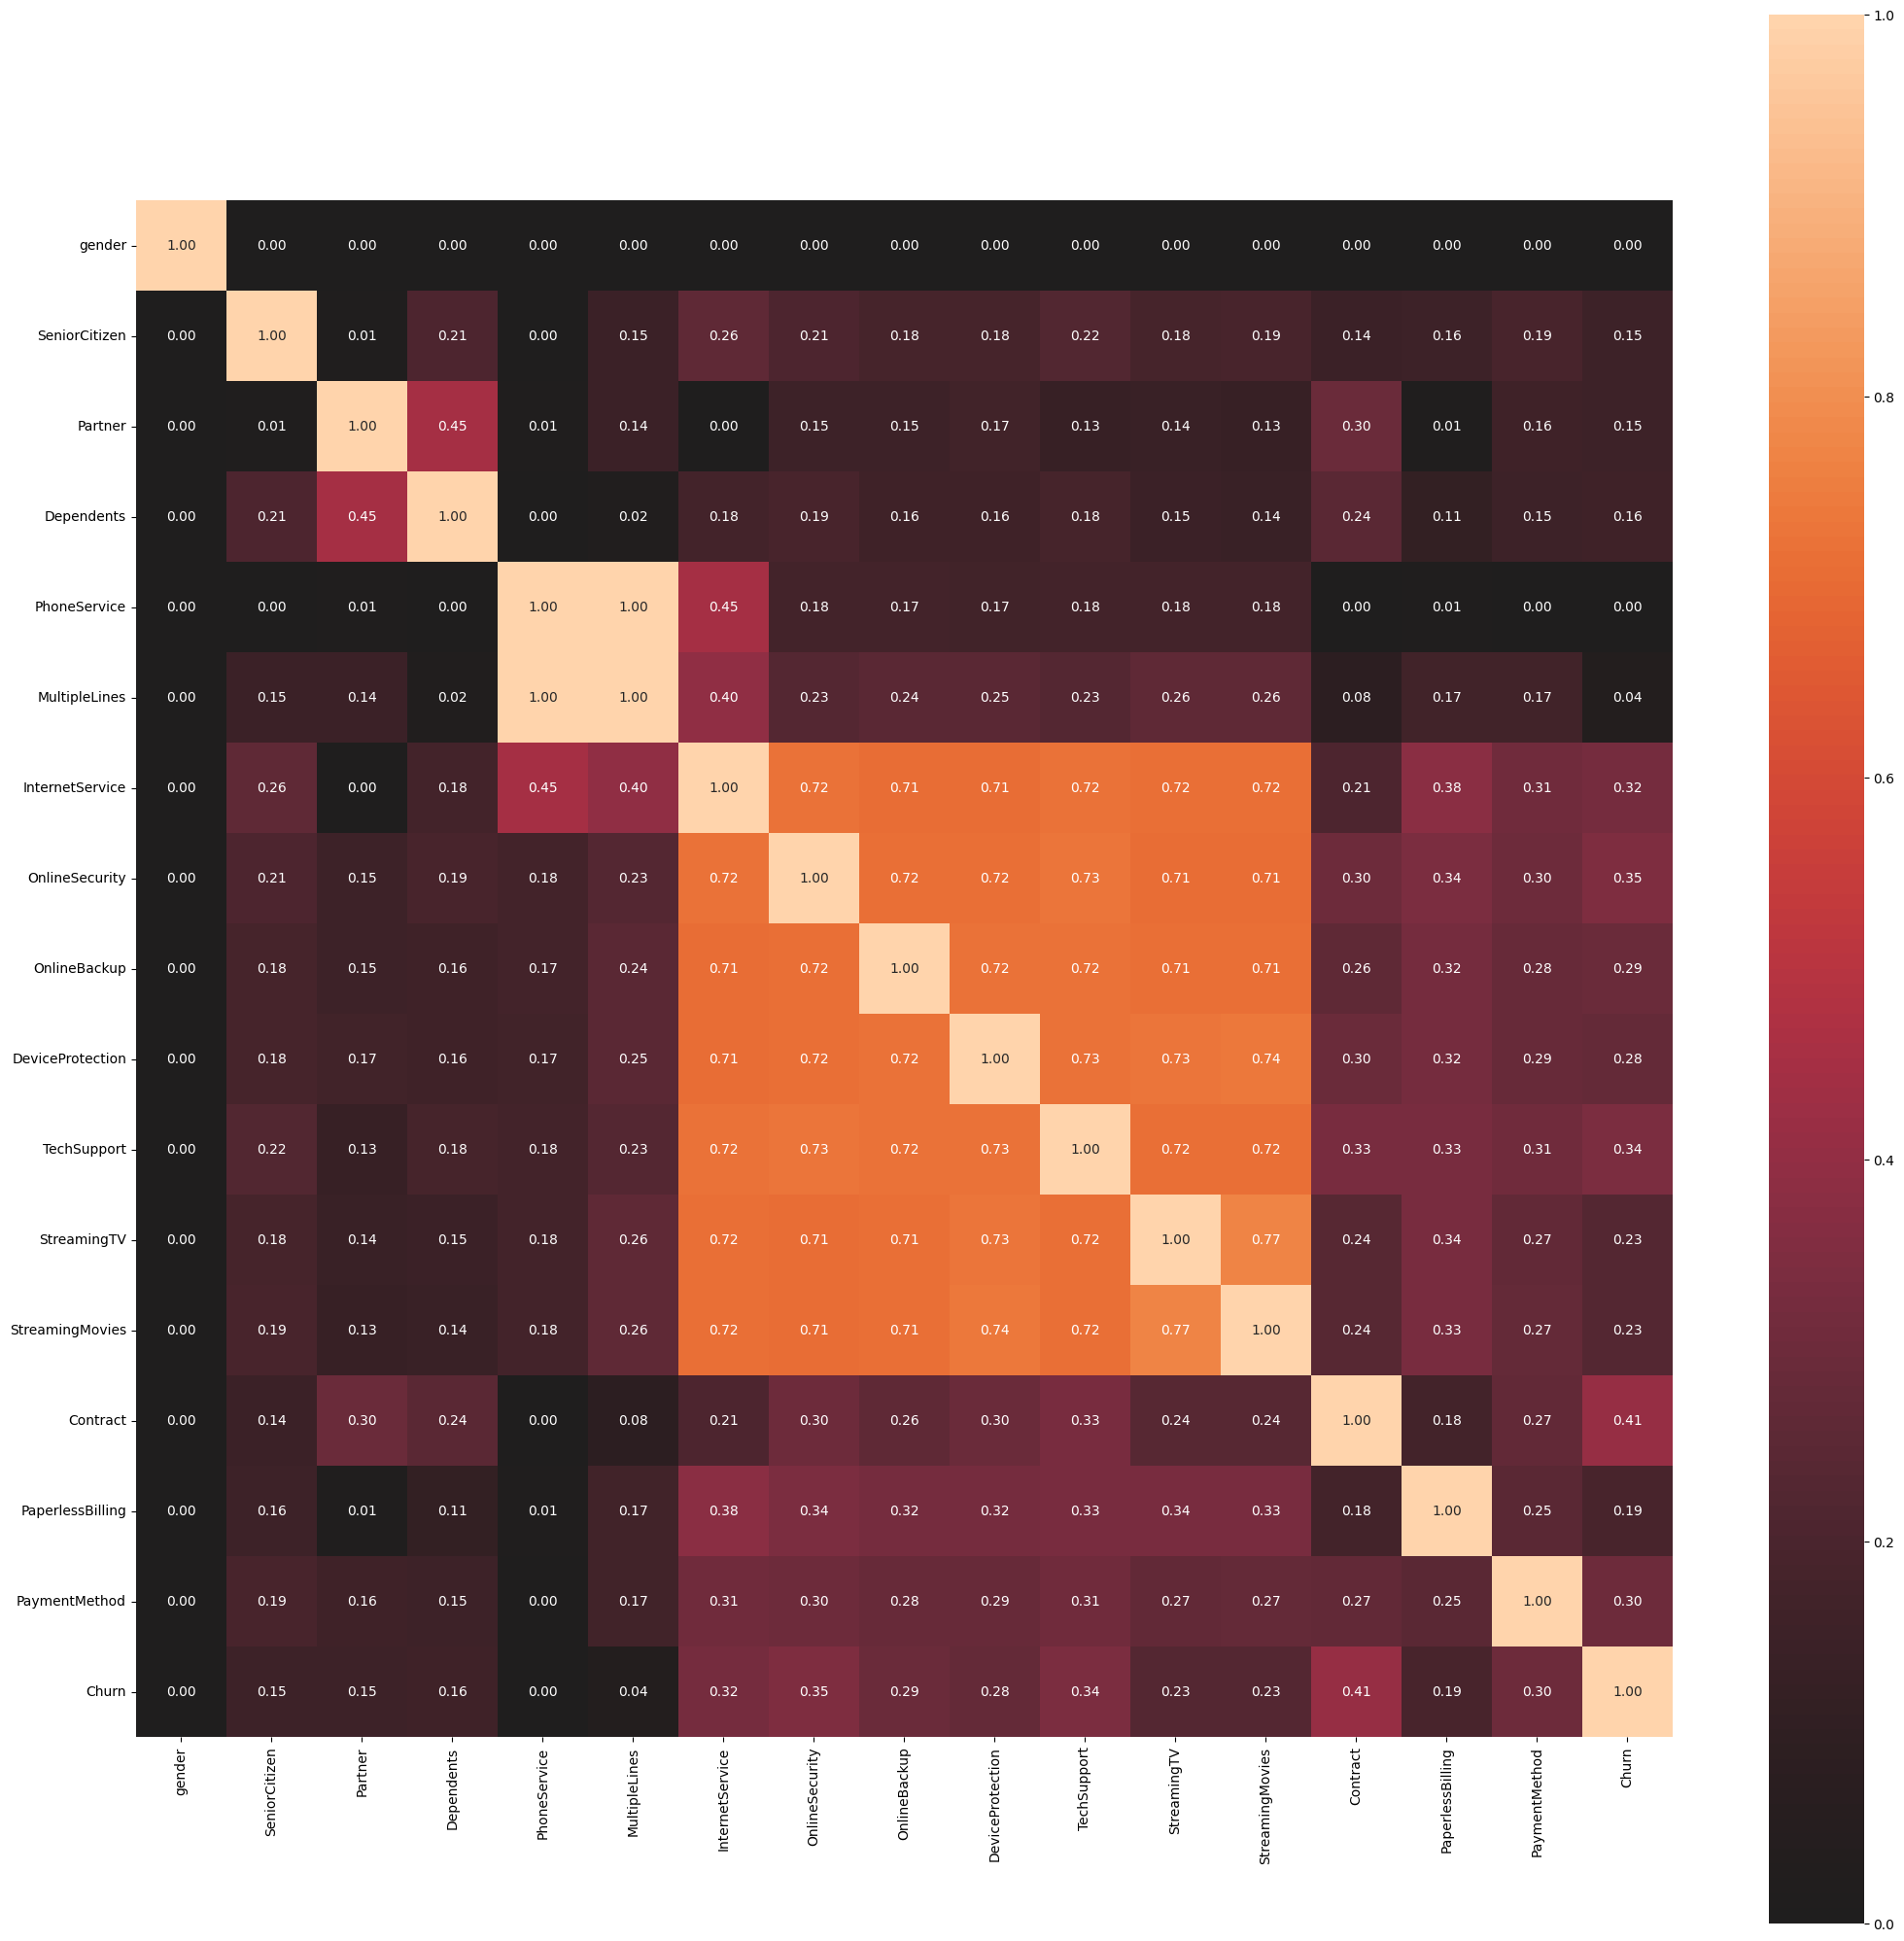

In [35]:
#a relevant measure of association between each feature
assoc = associations(df[cat_features], nominal_columns='all', plot=False)
assoc

In [36]:
corr_matrix = assoc['corr']
corr_matrix

,gender,SeniorCitizen,Partner,Dependents,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,Churn
gender,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.002416,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
SeniorCitizen,0.000000,1.000000,0.010817,0.210442,0.000000,0.145682,0.264807,0.210411,0.182008,0.182307,0.223432,0.184832,0.188222,0.142888,0.155693,0.194908,0.149991
Partner,0.000000,0.010817,1.000000,0.452241,0.012439,0.142918,0.000000,0.151083,0.152419,0.165725,0.126533,0.136314,0.128482,0.295580,0.008414,0.161460,0.149663
Dependents,0.000000,0.210442,0.452241,1.000000,0.000000,0.018594,0.179491,0.193862,0.161897,0.156677,0.181610,0.146124,0.140337,0.243647,0.110429,0.149335,0.163448
PhoneService,0.000000,0.000000,0.012439,0.000000,1.000000,0.999929,0.452144,0.175477,0.172007,0.171504,0.176185,0.179658,0.176731,0.000000,0.010702,0.000000,0.000000
MultipleLines,0.000000,0.145682,0.142918,0.018594,0.999929,1.000000,0.396424,0.229022,0.244617,0.245800,0.229577,0.261286,0.261852,0.078633,0.165496,0.165672,0.036400
InternetService,0.000000,0.264807,0.000000,0.179491,0.452144,0.396424,1.000000,0.724373,0.707084,0.707007,0.722811,0.717003,0.715911,0.206263,0.378079,0.312486,0.322037
OnlineSecurity,0.002416,0.210411,0.151083,0.193862,0.175477,0.229022,0.724373,1.000000,0.718339,0.717195,0.732982,0.707688,0.708108,0.300920,0.341408,0.304303,0.347016
OnlineBackup,0.000000,0.182008,0.152419,0.161897,0.172007,0.244617,0.707084,0.718339,1.000000,0.719030,0.719739,0.714602,0.713584,0.258059,0.320626,0.281802,0.291850
DeviceProtection,0.000000,0.182307,0.165725,0.156677,0.171504,0.245800,0.707007,0.717195,0.719030,1.000000,0.726393,0.733572,0.735959,0.296540,0.321212,0.286319,0.281095


In [38]:
corr_matrix[corr_matrix.loc['Churn'] > 0.3]

,gender,SeniorCitizen,Partner,Dependents,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,Churn
InternetService,0.000000,0.264807,0.000000,0.179491,0.452144,0.396424,1.000000,0.724373,0.707084,0.707007,0.722811,0.717003,0.715911,0.206263,0.378079,0.312486,0.322037
OnlineSecurity,0.002416,0.210411,0.151083,0.193862,0.175477,0.229022,0.724373,1.000000,0.718339,0.717195,0.732982,0.707688,0.708108,0.300920,0.341408,0.304303,0.347016
TechSupport,0.000000,0.223432,0.126533,0.181610,0.176185,0.229577,0.722811,0.732982,0.719739,0.726393,1.000000,0.716170,0.716230,0.330639,0.329116,0.306237,0.342526
Contract,0.000000,0.142888,0.295580,0.243647,0.000000,0.078633,0.206263,0.300920,0.258059,0.296540,0.330639,0.235332,0.238078,1.000000,0.176857,0.265892,0.409798
PaymentMethod,0.000000,0.194908,0.161460,0.149335,0.000000,0.165672,0.312486,0.304303,0.281802,0.286319,0.306237,0.272930,0.273921,0.265892,0.247878,1.000000,0.302677
Churn,0.000000,0.149991,0.149663,0.163448,0.000000,0.036400,0.322037,0.347016,0.291850,0.281095,0.342526,0.229902,0.230351,0.409798,0.191141,0.302677,1.000000


In [39]:
corr_matrix[corr_matrix.loc['Churn'] > 0.3].index

Index(['InternetService', 'OnlineSecurity', 'TechSupport', 'Contract',
       'PaymentMethod', 'Churn'],
      dtype='str')

In [55]:
selected_cat_features = corr_matrix[corr_matrix.loc['Churn'] > 0.3].index.tolist()
selected_cat_features

['InternetService',
 'OnlineSecurity',
 'TechSupport',
 'Contract',
 'PaymentMethod',
 'Churn']

In [56]:
#remove "Churn"
selected_cat_features = selected_cat_features[:-1]
selected_cat_features

['InternetService',
 'OnlineSecurity',
 'TechSupport',
 'Contract',
 'PaymentMethod']

In [57]:
#Combine selected features into one list.
selected_features = selected_num_features + selected_cat_features
selected_features

['tenure',
 'InternetService',
 'OnlineSecurity',
 'TechSupport',
 'Contract',
 'PaymentMethod']

In [58]:
#Use selected features as predictors X and churn target as y.
X = df[selected_features]
y = df[target]

In [61]:
#categorical and numeric features
cat_features = X.select_dtypes(include=['object']).columns.tolist()
num_features = X.select_dtypes(include=['number']).columns.tolist()
cat_features, num_features

/tmp/ipython-input-816719048.py:2: Pandas4Warning: For backward compatibility, 'str' dtypes are included by select_dtypes when 'object' dtype is specified. This behavior is deprecated and will be removed in a future version. Explicitly pass 'str' to `include` to select them, or to `exclude` to remove them and silence this warning.
See https://pandas.pydata.org/docs/user_guide/migration-3-strings.html#string-migration-select-dtypes for details on how to write code that works with pandas 2 and 3.
  cat_features = X.select_dtypes(include=['object']).columns.tolist()


(['InternetService',
  'OnlineSecurity',
  'TechSupport',
  'Contract',
  'PaymentMethod'],
 ['tenure'])

In [64]:
from sklearn.model_selection import train_test_split

#split 20% test data with stratification
X_train_val, X_test, y_train_val, y_test = train_test_split(X, y, test_size=0.2,
                                                            random_state=42, stratify=y)

#split 20% of the rest data for validation, 60% for testing
X_train, X_val, y_train, y_val = train_test_split(X_train_val, y_train_val,
                                                  test_size=0.25, random_state=42,
                                                  stratify=y_train_val)

In [65]:
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import OneHotEncoder
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report

#One hot encode categorical variables
preprocessor = ColumnTransformer(
    transformers=[
        ('num', 'passthrough', num_features),
        ('cat', OneHotEncoder(handle_unknown='ignore'), cat_features)
    ])

In [66]:
#Use pipeline for model transformation and training.
pipeline = Pipeline(steps=[
    ('preprocessor', preprocessor),
    ('classifier', LogisticRegression(max_iter=1000))
])

pipeline.fit(X_train, y_train)

y_val_pred = pipeline.predict(X_val)
print("Validation Classification Report:\n", classification_report(y_val, y_val_pred))

Validation Classification Report:
               precision    recall  f1-score   support

           0       0.84      0.90      0.87      1035
           1       0.65      0.54      0.59       374

    accuracy                           0.80      1409
   macro avg       0.75      0.72      0.73      1409
weighted avg       0.79      0.80      0.80      1409



In [67]:
from sklearn.model_selection import GridSearchCV

#tune model parameters using recall metric
param_grid = {
    'classifier__C': [0.1, 1, 10, 100],
    'classifier__solver': ['lbfgs', 'liblinear']
}

#Select best settings based on validation performance.
grid_search = GridSearchCV(pipeline, param_grid, cv=5, scoring='recall')
grid_search.fit(X_train, y_train)

print("Best Hyperparameters:", grid_search.best_params_)

y_test_pred = grid_search.predict(X_test)
print("Test Classification Report:\n", classification_report(y_test, y_test_pred))

Best Hyperparameters: {'classifier__C': 1, 'classifier__solver': 'lbfgs'}
Test Classification Report:
               precision    recall  f1-score   support

           0       0.84      0.89      0.86      1035
           1       0.63      0.54      0.58       374

    accuracy                           0.79      1409
   macro avg       0.74      0.71      0.72      1409
weighted avg       0.79      0.79      0.79      1409



In [68]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier
from sklearn.svm import SVC
from xgboost import XGBClassifier
from lightgbm import LGBMClassifier
from sklearn.metrics import recall_score

#Train different ML models like decision tree, random forest, support vetor machine, etc on same pipeline.
models = {
    'Logistic Regression': LogisticRegression(max_iter=1000),
    'Decision Tree': DecisionTreeClassifier(),
    'Random Forest': RandomForestClassifier(),
    'SVM': SVC(),
    'Gradient Boosting': GradientBoostingClassifier(),
    'XGBoost': XGBClassifier(use_label_encoder=False, eval_metric='logloss'),
    'LightGBM': LGBMClassifier()
}


In [69]:
#Calculate recall on test set
results = []

for name, model in models.items():
    pipe = Pipeline(steps=[
        ('preprocessor', preprocessor),
        ('classifier', model)
    ])
    pipe.fit(X_train, y_train)
    y_pred = pipe.predict(X_test)
    recall = recall_score(y_test, y_pred)

    results.append((name, recall))

results

/usr/local/lib/python3.12/dist-packages/xgboost/training.py:199: UserWarning: [13:12:21] WARNING: /workspace/src/learner.cc:790: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)


[LightGBM] [Info] Number of positive: 1121, number of negative: 3104
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.000686 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 105
[LightGBM] [Info] Number of data points in the train set: 4225, number of used features: 17
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.265325 -> initscore=-1.018470
[LightGBM] [Info] Start training from score -1.018470


/usr/local/lib/python3.12/dist-packages/sklearn/utils/validation.py:2691: UserWarning: X does not have valid feature names, but LGBMClassifier was fitted with feature names
  warnings.warn(


[('Logistic Regression', 0.5374331550802139),
 ('Decision Tree', 0.4786096256684492),
 ('Random Forest', 0.5213903743315508),
 ('SVM', 0.43315508021390375),
 ('Gradient Boosting', 0.5454545454545454),
 ('XGBoost', 0.5106951871657754),
 ('LightGBM', 0.5320855614973262)]

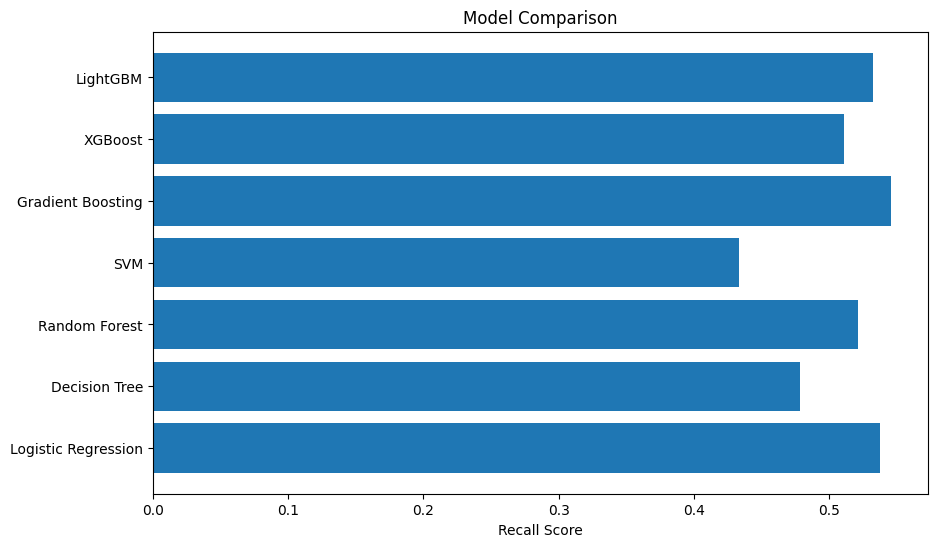

In [70]:
#Visualize recall score performance for each model
model_names = [r[0] for r in results]
test_recalls = [r[1] for r in results]

plt.figure(figsize=(10, 6))
plt.barh(model_names, test_recalls)
plt.xlabel('Recall Score')
plt.title('Model Comparison')
plt.show()

In [71]:
#Save the model with best parameters Used later for deployment (FastAPI, Streamlit etc.)
import joblib

best_model = grid_search.best_estimator_
joblib.dump(best_model, 'model.joblib')

['model.joblib']